In [44]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.svm import SVC #support vector classifier

In [2]:
flowers = load_iris()
dir(flowers)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
flowers.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(flowers.data, columns=flowers.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df['target']=flowers.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df['flower_names']=df.target.apply(lambda x: flowers.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [20]:
df.flower_names.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
df.target.unique()

array([0, 1, 2])

In [22]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [23]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [24]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [25]:
df_setosa = df[df.target==0]
df_versicolor = df[df.target==1]
df_verginica = df[df.target==2]

In [27]:
df_setosa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
import matplotlib.pyplot as plt

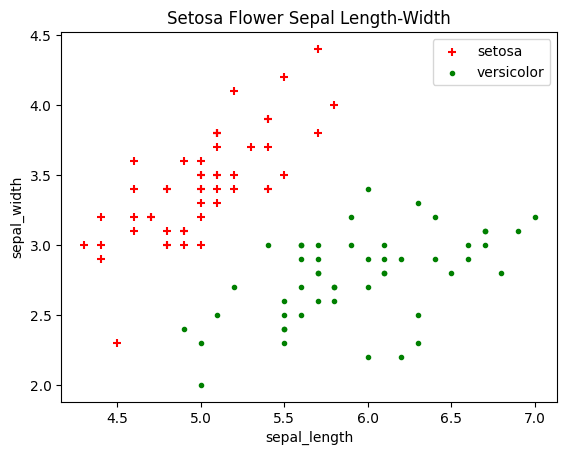

In [38]:
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Setosa Flower Sepal Length-Width')
plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'], color='red', marker='+')
plt.scatter(df_versicolor['sepal length (cm)'], df_versicolor['sepal width (cm)'], color='green', marker='.')
plt.legend(['setosa', 'versicolor'])
plt.show()

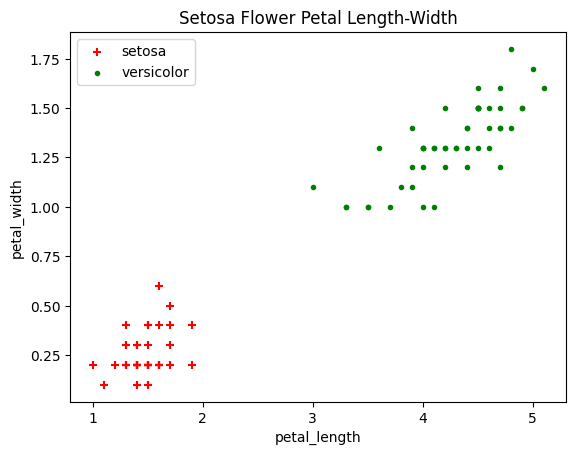

In [39]:
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Setosa Flower Petal Length-Width')
plt.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'], color='red', marker='+')
plt.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'], color='green', marker='.')
plt.legend(['setosa', 'versicolor'])
plt.show()

In [40]:
x = df.drop(['target', 'flower_names'], axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)
x_train.shape

(127, 4)

In [45]:
model = SVC()

In [46]:
model.fit(x_train, y_train)

SVC()

In [47]:
model.score(x_test, y_test)

1.0